In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
# reading data
ds = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
ds.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
# checking unique values
ds.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

In [14]:
#printing unique values

print('Gender           :', ds.Gender.unique())
print('Marital_Status   :', ds.Marital_Status.unique())
print('Product_Category :', ds.Product_Category.unique())

Gender           : ['F' 'M']
Marital_Status   : [0 1]
Product_Category : ['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' 'Books'
 'Electronics & Gadgets' 'Decor' 'Clothing & Apparel' 'Beauty'
 'Household items' 'Pet Care' 'Veterinary' 'Office']


In [17]:
Checking duplicated values 
ds.duplicated().sum()

8

In [19]:
# deleting duplicates
ds.drop_duplicates(inplace=True)

In [21]:
#checking null values
ds.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11243
unnamed1            11243
dtype: int64

In [23]:
# since too many null values in status and unnamed, dropping those two columns
ds.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [24]:
ds.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


<Axes: xlabel='Amount', ylabel='Density'>

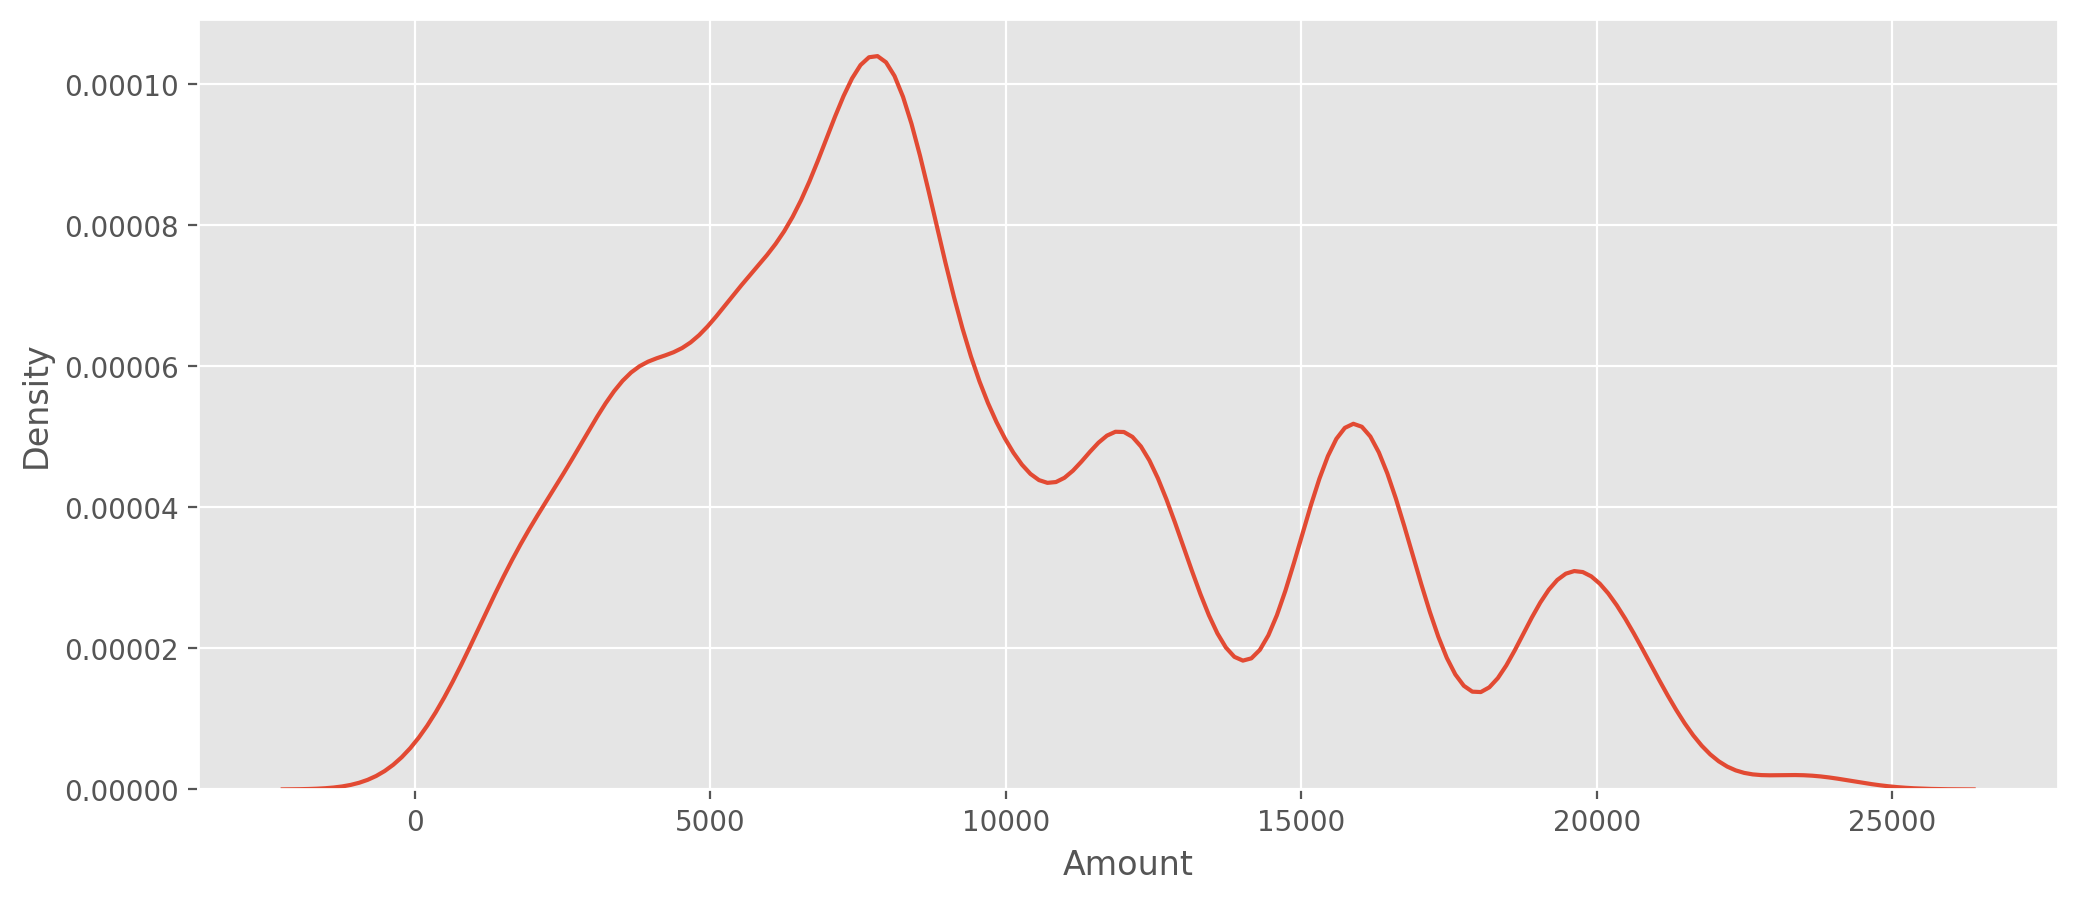

In [27]:
#ds['Amount'] = ds['Amount'].astype('int')
# Amount has 12 missing values, trying to figure out avrage amount
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(ds.Amount, hist=False)

In [32]:
# data is not too much skewed, can replace with median as missing values
mean_amt = ds.Amount.mean()
ds.Amount.replace(np.nan, mean_amt, inplace =True)

In [33]:
ds.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [35]:
ds.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [36]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
ds.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.124300e+04,11243.000000,11243.000000,11243.000000,11243.000000
mean,1.003005e+06,35.422841,0.420261,2.488749,9454.084982
std,1.716141e+03,12.756369,0.493623,1.114960,5218.941128
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001494e+06,27.000000,0.000000,1.000000,5444.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8111.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12672.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [38]:
# use describe() for specific columns
ds[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11243.000000,11243.000000,11243.000000
mean,35.422841,2.488749,9454.084982
std,12.756369,1.114960,5218.941128
min,12.000000,1.000000,188.000000
25%,27.000000,1.000000,5444.000000
50%,33.000000,2.000000,8111.000000
75%,43.000000,3.000000,12672.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

<Axes: xlabel='Gender', ylabel='Amount'>

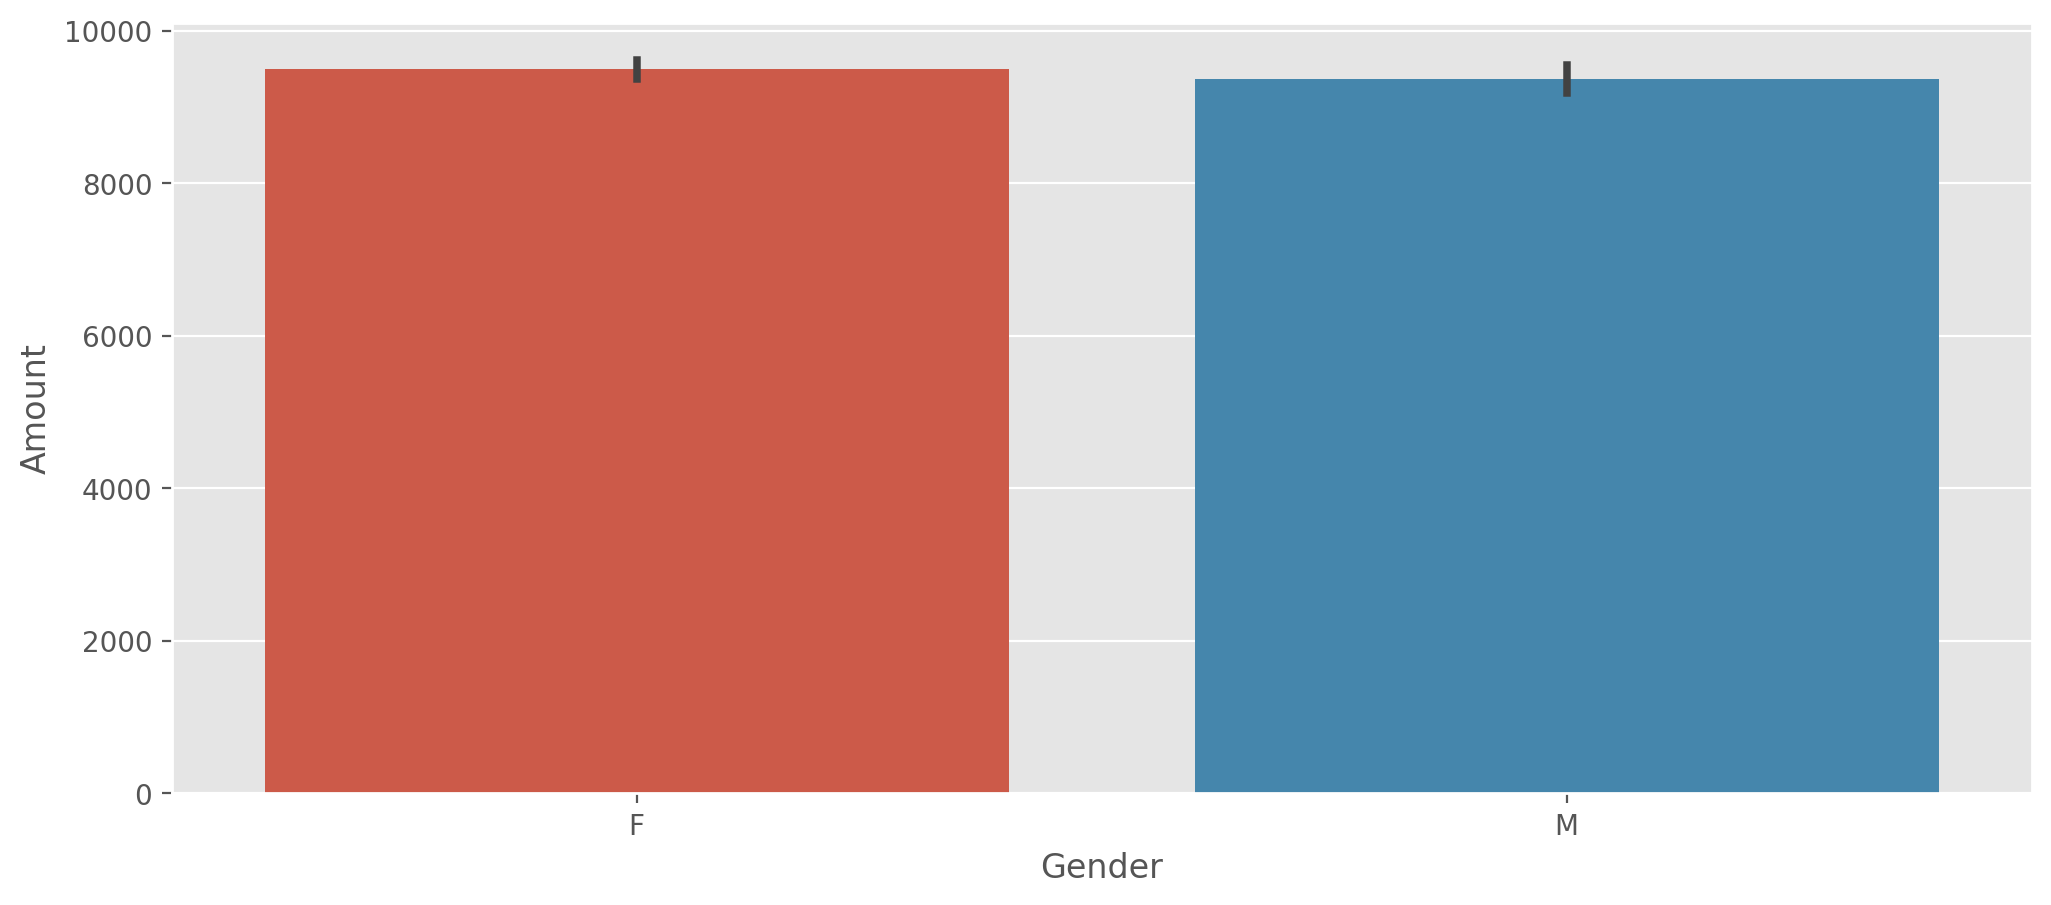

In [62]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(x="Gender",y='Amount',data=ds)

In [51]:
ds.Gender.unique()

array(['F', 'M'], dtype=object)

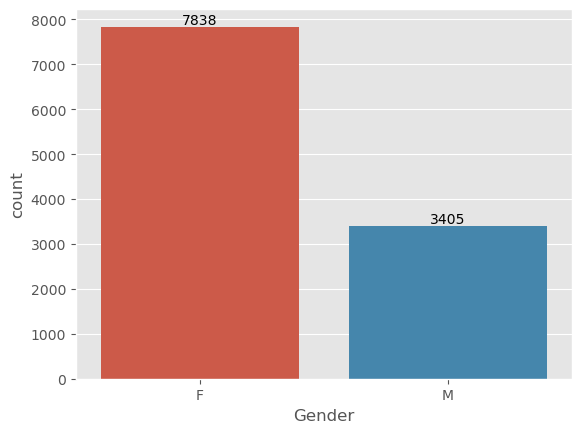

In [63]:
# plotting a bar chart for Gender and it's count
d=sns.countplot(x = 'Gender',data = ds)

for bars in d.containers:
    d.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

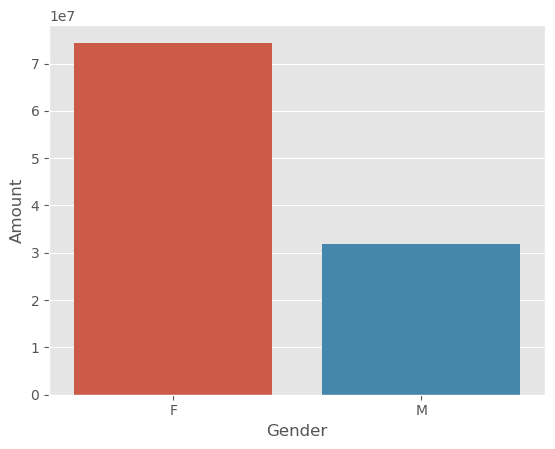

In [71]:
sales = ds.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount',data=sales)

### From above graphs we can see that most of the buyers are females and even the females spend greater money than men

# Age

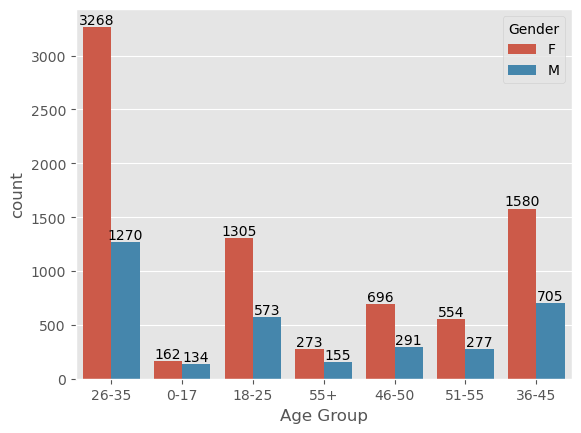

In [73]:
ag = sns.countplot(data = ds, x = 'Age Group', hue = 'Gender')

for bars in ag.containers:
    ag.bar_label(bars)

In [87]:
s_age = ds.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
s_age

,Age Group,Amount
2,26-35,4.260068e+07
3,36-45,2.216350e+07
1,18-25,1.723553e+07
4,46-50,9.245660e+06
5,51-55,8.256817e+06
6,55+,4.090441e+06
0,0-17,2.699653e+06


<Axes: xlabel='Age Group', ylabel='Amount'>

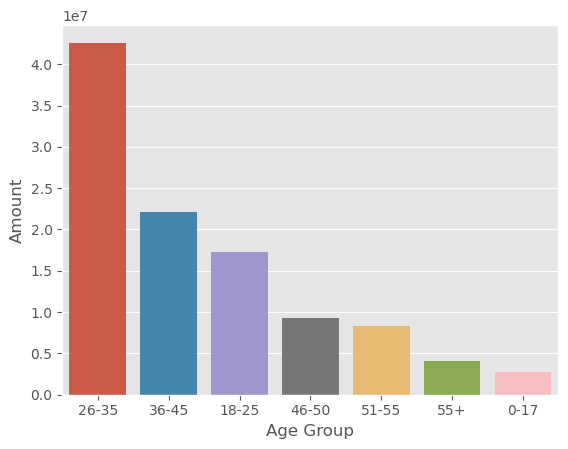

In [89]:
sns.barplot(x = 'Age Group',y= 'Amount' ,data = s_age)

### most of the buyers are of age group between 26-35 yrs female

# State

<Axes: xlabel='State', ylabel='Orders'>

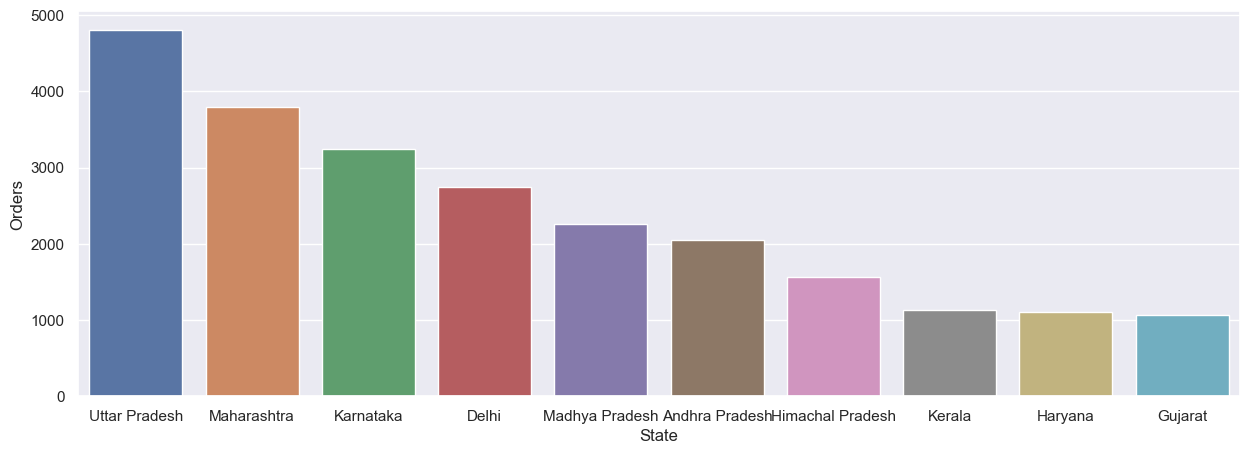

In [91]:
sales_state = ds.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

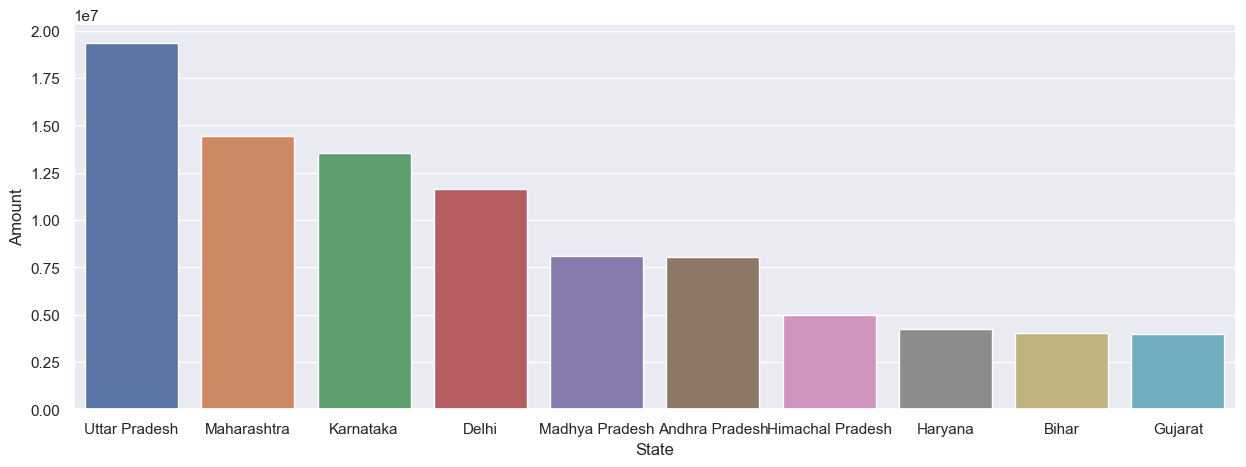

In [92]:
# total amount/sales from top 10 states

sales_state = ds.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

### we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital Status

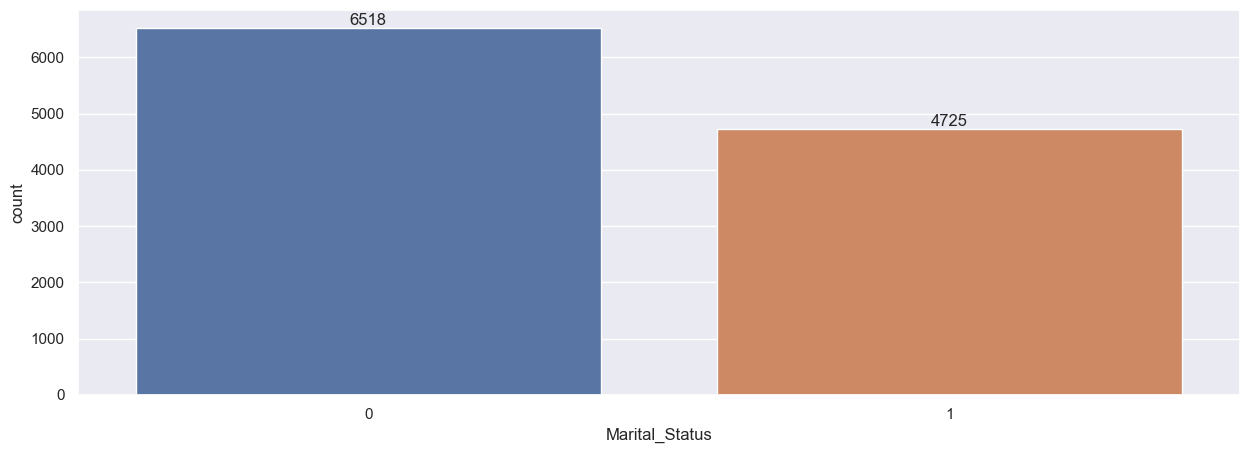

In [94]:
ax = sns.countplot(data = ds, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

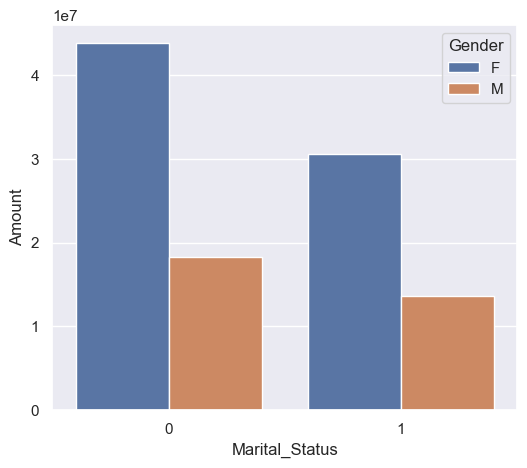

In [96]:
sales_state = ds.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

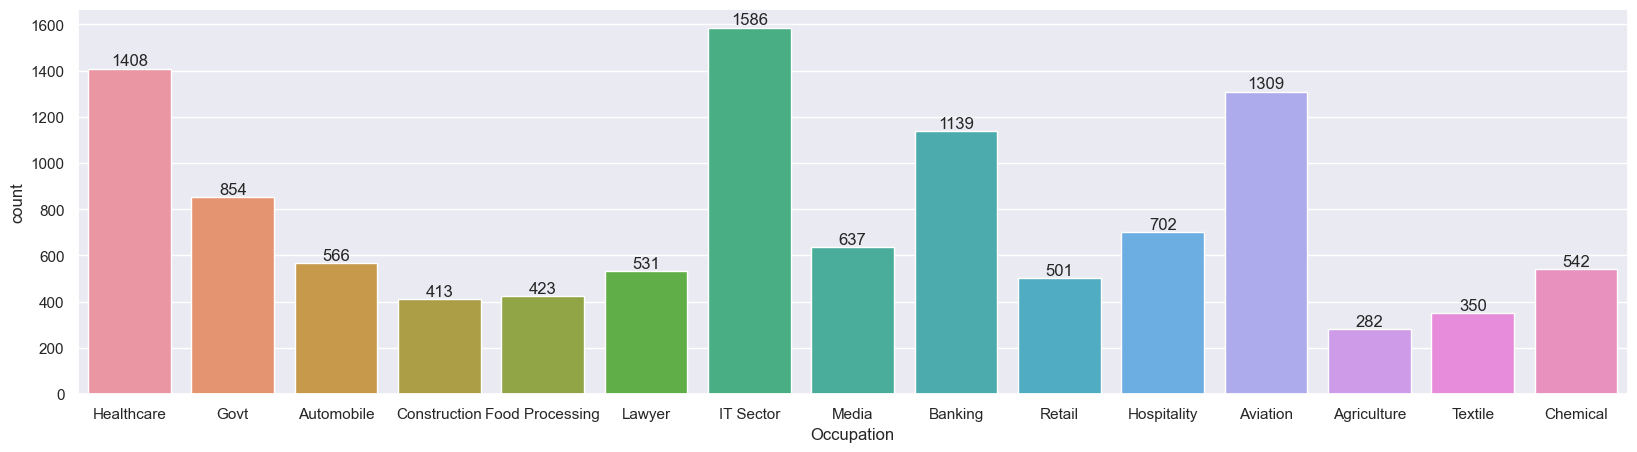

In [98]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = ds, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

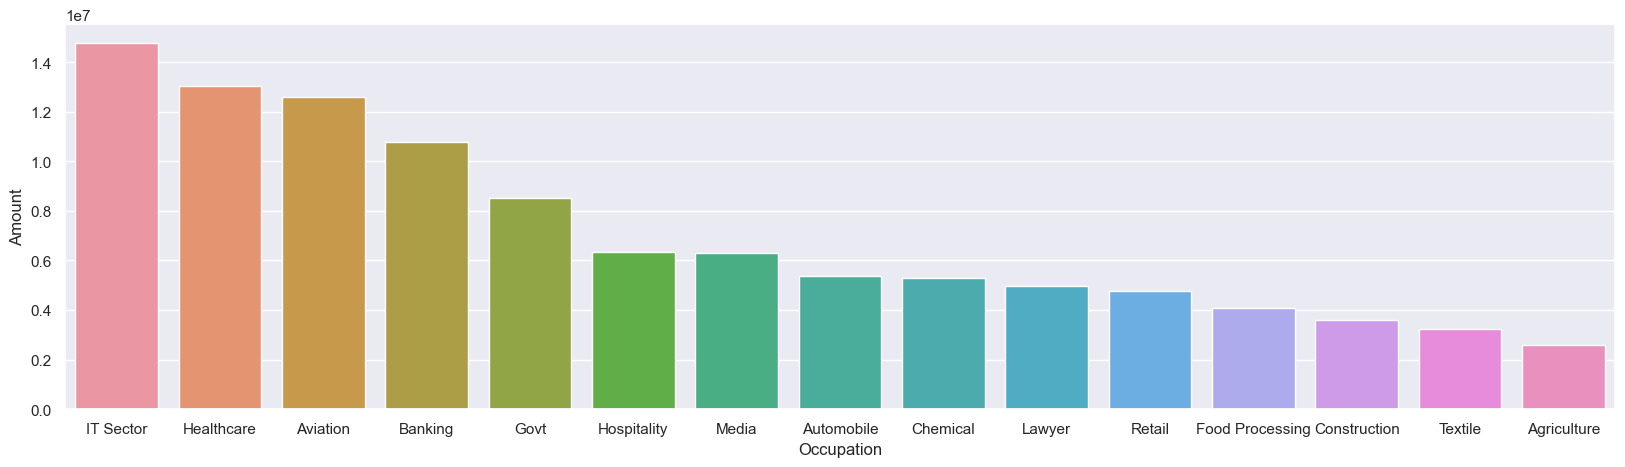

In [99]:
sales_state = ds.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

# Product Category

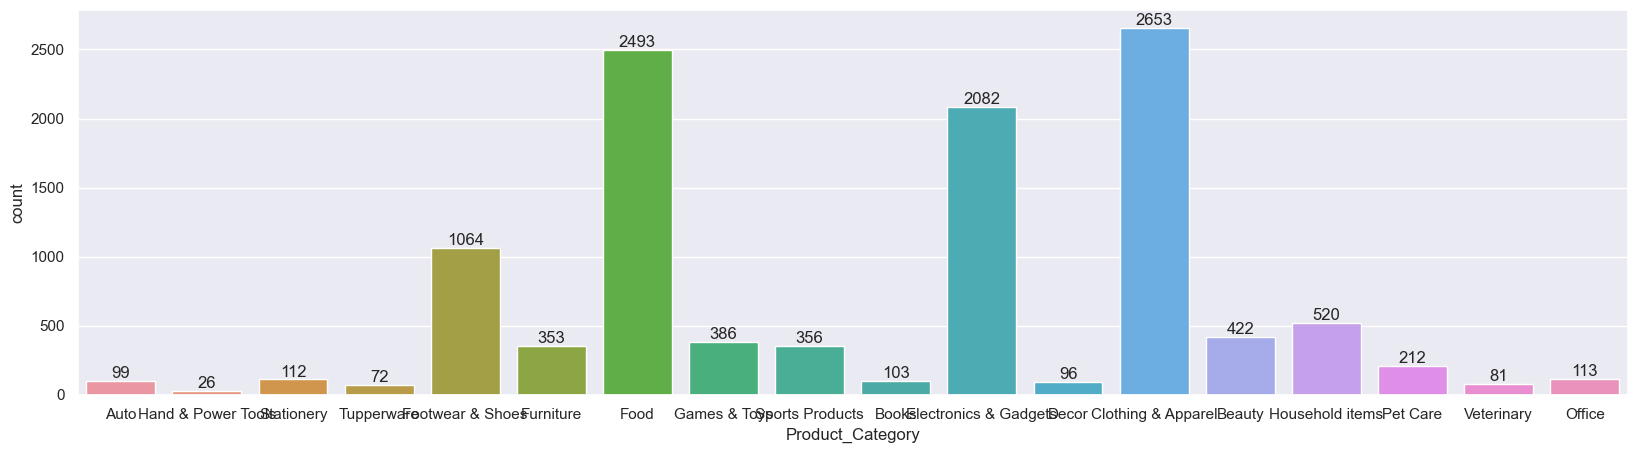

In [100]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = ds, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

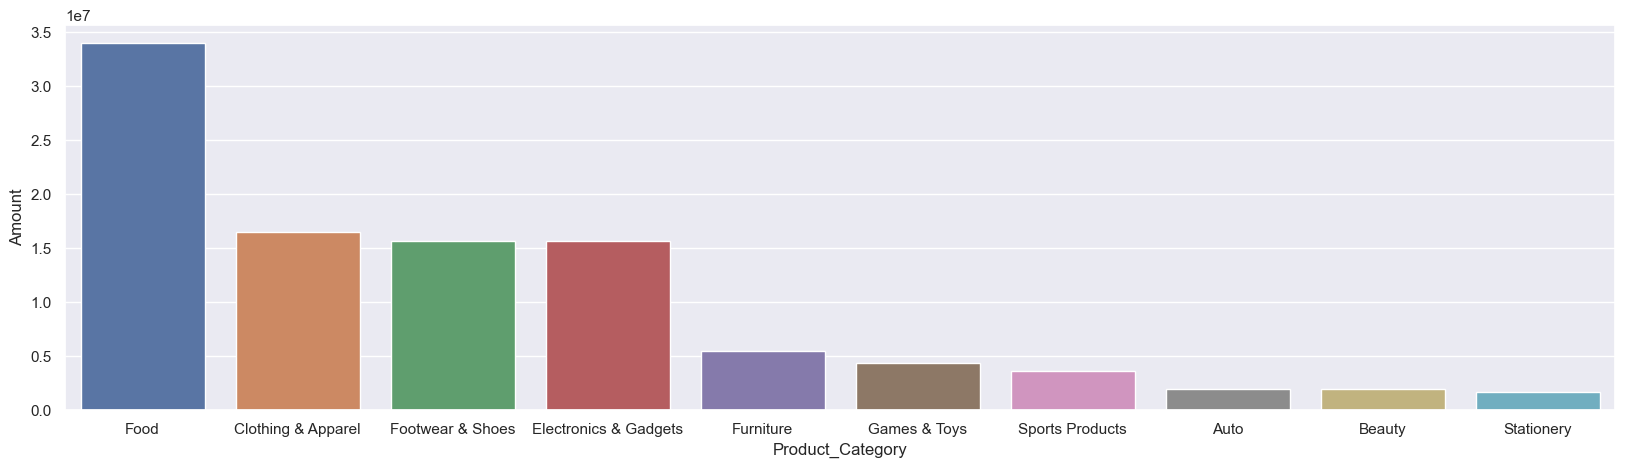

In [102]:
sales_state = ds.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

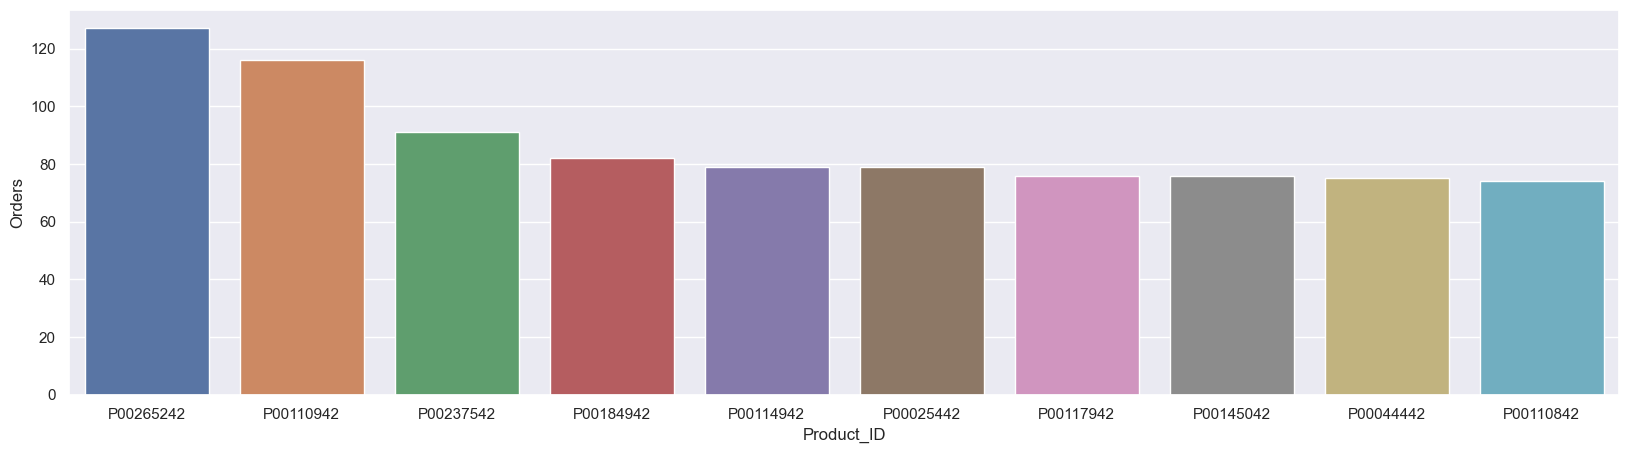

In [104]:
sales_state = ds.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

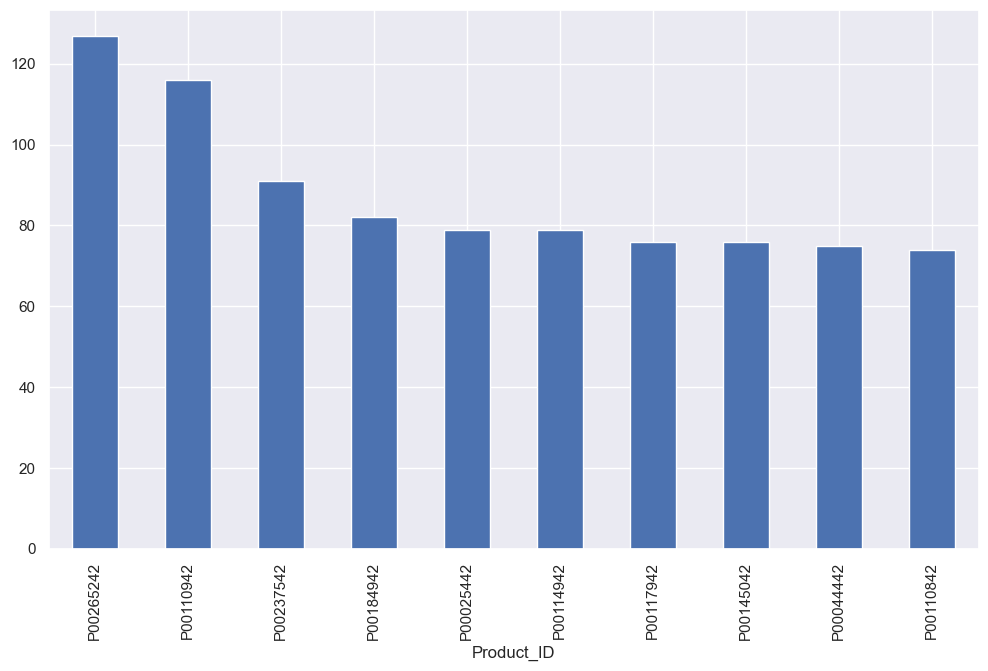

In [105]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
ds.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category